In [2]:
import matplotlib.pyplot as plt

from jieba import cut
from time import sleep
from snownlp import SnowNLP
from pandas import DataFrame
from bs4 import BeautifulSoup
from selenium import webdriver
from wordcloud import WordCloud
from collections import Counter

In [11]:
url = 'https://www.cupoy.com/newsfeed/topicgrp/tech_tw'
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)
sleep(5)

count = 1
articleSum = 500
categorylist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= articleSum) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、文章內容、文章來源、文章網址抓下來
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        href = artical.find("a").get('href')
        # 防止爬到重複的文章
        if title not in titlelist:
            # 將各資料存進list以供後續分析
            categorylist.append(category)
            titlelist.append(title)
            contentlist.append(content)
            hreflist.append(href)
            # count表文章爬到的數目
            count += 1
        # 停止條件，抓到500篇文章即終止程式
        if count == (articleSum + 1):
            break
    
    # 將網頁繼續向下滑
    sleep(0.7)
    browser.execute_script("window.scrollTo(0, 1000000);")
browser.quit()

In [12]:
# 資料排序後顯示
columnName = ['種類','標題','簡介','網址']

data = DataFrame([categorylist, titlelist, contentlist, hreflist])
data = data.T
data.columns = columnName
#data = data.set_index('種類').sort_index()
data

,種類,標題,簡介,網址
0,Google專區,惱人的影片廣告掰掰！Google 宣佈將於 8/5 開始封鎖這三類的影片廣告！ - 電獺少女,影片看到一半跳出廣告真的很惱人啊！,https://agirls.aotter.net/post/56826?utm_sourc...
1,Fintech金融科技,拍照打卡逐漸稀釋地方脈絡，可能是觀光喧嘩表面底下潛藏的危機 - The News Lens ...,當代的旅遊、拍照打卡活動蔚為盛行，確實帶動了整體觀光產業與人潮，然而在越來越相似的地方「特色...,https://www.thenewslens.com/article/131117?utm...
2,蘋果專區,Qurb 線上 Mockup 產生器，擷圖套用 iPhone、MacBook 外框更有質感,本文要介紹的「Qurb」是能讓擷取畫面變得更有質感的 Mockup 產生器，簡單來說，Qur...,https://free.com.tw/qurb/?utm_content=buffere6...
3,相機,Canon 發豪語：將於 2020 年推出 9 款 RF 鏡頭，包含 24-105 與 10...,今年是東京奧運年，自 2018 年推出的 Canon EOS R 系統經營迄今也已有不錯的成...,https://www.techbang.com/posts/76208-canon-rf-...
4,Fintech金融科技,《1人健身》：維持肌力訓練的重點在於「管理你的意志力」 - The News Lens 關鍵評論網,研究人員針會各種金錢帶來的持續效應進行驗證。結果顯示，金錢確實會使人願意參與肌力訓練，但一旦...,https://www.thenewslens.com/article/130630
5,Google專區,無跳轉移！微軟 Microsoft Edge 瀏覽器安裝 Chrome 擴充功能教學,如果以 Edge 開啟 Chrome 應用程式商店會出現警告訊息，預設情況不會出現擴充功能下...,https://free.com.tw/microsoft-edge-install-chr...
6,資訊安全,WordPress Security Scanner 掃描你的網站是否有已知弱點,WordPress Security Scanner 是一個免費的 WordPress 安全...,https://free.com.tw/wordpress-security-scanner...
7,Fintech金融科技,又抓到假新聞！高雄警方查出女網友炫燿武漢偷渡返臺是假帳號 - INSIDE,高雄警方已經在查發文者 IP，將約談當事人進一步查證，也將會同衛生局疾管處查緝是否造成防疫漏...,https://www.inside.com.tw/article/18926-kaohsi...
8,Fintech金融科技,臺灣太空產業想進軍國際，「飛行履歷」將成關鍵！ - INSIDE,太空產業非常重視「飛行履歷」，雖然臺灣企業有精密的技術，卻沒有實際應用在衛星或火箭上，在國際...,https://www.inside.com.tw/article/18925-Taiwan...
9,Fintech金融科技,通了！馬斯克的無聊公司打穿賭城第一條地下隧道 - INSIDE,兩地本來在地面街道上開車需要 15 分鐘，但 Elon Musk 說用 Tesla 電動汽車...,https://www.inside.com.tw/article/18924-elon-m...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
0    31 non-null object
1    31 non-null int64
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes
None


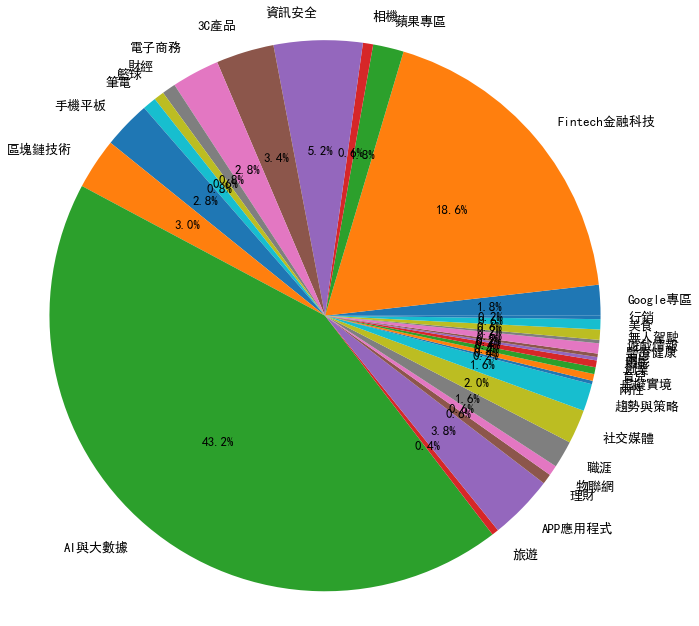

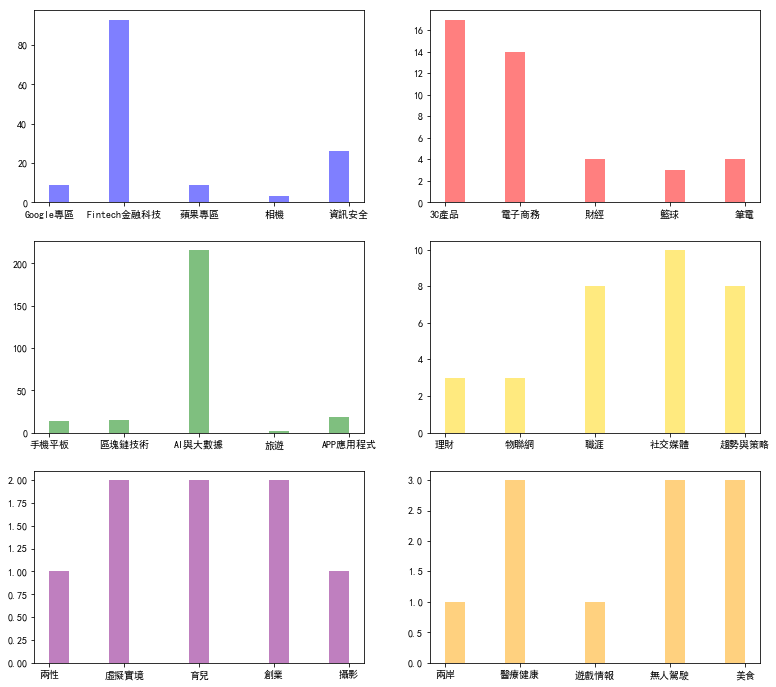

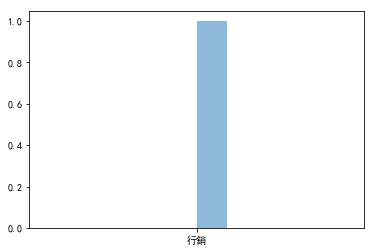

In [13]:
# 用Counter計算種類後排序顯示
sourceDict = dict(Counter(categorylist))
categoryDf = DataFrame(list(sourceDict.items()))
print(categoryDf.info())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
#plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

histshow_num = 5
histfigure_num_x = 3
histfigure_num_y = 2
# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 
         'orange', 'm', 'teal', 'rosybrown', 'olive', 
         'c', 'navy', 'thistle', 'palegreen', 'pink', 'turquoise'
         'y', 'chocolate', 'grey', 'crimson', 'darkcyan']
plotlist = []
plt.figure(figsize = (13,int(len(categoryDf)/2)-histfigure_num_x))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % histshow_num == 0:
        plt.subplot(histfigure_num_x, histfigure_num_y, int(count/histshow_num))
        plt.hist(plotlist, alpha=0.5, bins = 15, color=color[int(count/histshow_num-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()

In [14]:
# 準備標題語料
titleCorpus = ''
for title in titlelist:
    titleCorpus += title 

# 準備內容語料 
contentCorpus = ''
for content in contentlist:
    contentCorpus += content  

#停用詞設定
with open('stopWords.txt', 'r') as f:
    stops = f.read().split('\n')

# 對titleCorpus進行斷詞
term_titleCorpus = []
for word in cut(titleCorpus):
    if word not in stops:
        term_titleCorpus.append(word)
titleCount = dict(Counter(term_titleCorpus))

# 對contentCorpus進行斷詞
term_contentCorpus = []
for word in cut(contentCorpus):
    if word not in stops:
        term_contentCorpus.append(word)
contentCount = dict(Counter(term_contentCorpus))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.846 seconds.
Prefix dict has been built successfully.


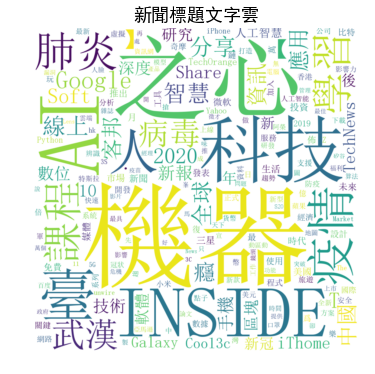

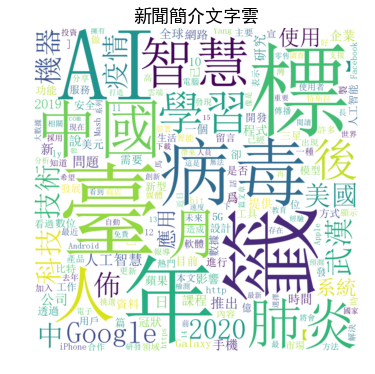

In [15]:
# 字體路徑設定
font = "C:\\Windows\\Fonts\\simsun.ttc"

# 標題文字雲繪圖
title_wordcloud = WordCloud(background_color="white",font_path = font, collocations=False, width=1200, height=1200, margin=2)  
title_wordcloud.generate_from_frequencies(frequencies = titleCount)
plt.figure(figsize=(5,5))
plt.title('新聞標題文字雲', fontsize = '18')
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 內容文字雲繪圖
content_wordcloud = WordCloud(background_color="white",font_path = font, collocations=False, width=1200, height=1200, margin=2)  
content_wordcloud.generate_from_frequencies(frequencies = contentCount)
plt.figure(figsize=(5,5))
plt.title('新聞簡介文字雲', fontsize = '18')
plt.imshow(content_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
# 計算標題的情緒分數
title_emotionScore = 0
for title in titlelist:
    s = SnowNLP(title)
    title_emotionScore += s.sentiments
print('標題的情感分析平均分數：', round(title_emotionScore / articleSum,3))

# 計算文章內容的情緒分數
content_emotionScore = 0
for content in contentlist:
    try:
        ss = SnowNLP(content)
        content_emotionScore += ss.sentiments
    except:
        continue
print('文章內容的情感分析平均分數：', round(content_emotionScore / articleSum,3))

print('(該分數表示文章為正面的機率為多少)')

標題的情感分析平均分數： 0.541
文章內容的情感分析平均分數： 0.331
(該分數表示文章為正面的機率為多少)
